In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [40]:
# first we will import the dependencies
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### first we will merge the data that is divived into the months all into one dataset

In [3]:

files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)

In [4]:
df = pd.read_csv("./all_data.csv")

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### cleaning data

In [6]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### we can delete from rows which have all missing values.

In [7]:
df = df.dropna(axis="index", how="all")

In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### all the NaN values have been cleared out, but to be safe we can check whether there are other words that where not identified as NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [11]:
df["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [12]:
df["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [13]:
df["Purchase Address"].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

### after looking at all the unique values we can determine that there are rows which are copies of the header, these should also be deleted.

In [14]:
df.loc[df["Product"]=="Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
df[df["Product"]!="Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### we will here remove all the rows where the header is repeated

In [16]:
df = df[df["Product"]!="Product"]

In [17]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

# Data handling

## Splitting columns

In [18]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


#### we can split the purhase address column so that we can separe the city from the state and the house address

In [19]:
df["Purchase Address"].str.split(", ")

0                    [917 1st St, Dallas, TX 75001]
2               [682 Chestnut St, Boston, MA 02215]
3            [669 Spruce St, Los Angeles, CA 90001]
4            [669 Spruce St, Los Angeles, CA 90001]
5               [333 8th St, Los Angeles, CA 90001]
                            ...                    
186845     [840 Highland St, Los Angeles, CA 90001]
186846    [216 Dogwood St, San Francisco, CA 94016]
186847       [220 12th St, San Francisco, CA 94016]
186848     [511 Forest St, San Francisco, CA 94016]
186849     [250 Meadow St, San Francisco, CA 94016]
Name: Purchase Address, Length: 185950, dtype: object

In [20]:
df["Purchase Address"].str.split(", ",expand=True)

,0,1,2
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
4,669 Spruce St,Los Angeles,CA 90001
5,333 8th St,Los Angeles,CA 90001
...,...,...,...
186845,840 Highland St,Los Angeles,CA 90001
186846,216 Dogwood St,San Francisco,CA 94016
186847,220 12th St,San Francisco,CA 94016
186848,511 Forest St,San Francisco,CA 94016


#### after confirming that the split was successfull we can create new columns in the original dataframe

In [21]:
df[["Address","City","State and Zip-code"]] = df["Purchase Address"].str.split(", ",expand=True)

In [22]:
df.drop(columns="Purchase Address",inplace=True)

#### we can split this column into just state and zip code alone

In [23]:
df["State and Zip-code"].unique()

array(['TX 75001', 'MA 02215', 'CA 90001', 'CA 94016', 'WA 98101',
       'GA 30301', 'NY 10001', 'OR 97035', 'TX 73301', 'ME 04101'],
      dtype=object)

In [24]:
df[["State","Zip code"]] = df["State and Zip-code"].str.split(" ",expand=True)

In [25]:
df.drop(columns="State and Zip-code",inplace=True)

#### changing the name of the column Price each to unit price

In [26]:
df.rename(columns={"Price Each":"Unit Price"}, inplace=True)

# Typecasting

#### typecasting unit price to float for calculations

In [27]:
df["Unit Price"] = df["Unit Price"].astype(float)

#### Typecasting the order date column to date datatype

In [28]:
df["Order Date"]=pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")

we can now create a class called time of day, where if time is between 
midnight to 12 = morning
12 to 16 = afternoon
16 to 24 = night

we can first create a new column and label all the values 

In [29]:
df["Time Of Day"] = ""

In [30]:
df.loc[df["Order Date"].dt.hour <12,"Time Of Day"] = "Morning"
df.loc[df["Order Date"].dt.hour >=12,"Time Of Day"] = "Afternoon"
df.loc[df["Order Date"].dt.hour >=16,"Time Of Day"] = "Night"

In [31]:
df

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Address,City,State,Zip code,Time Of Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,TX,75001,Morning
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,MA,02215,Night
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001,Afternoon
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001,Afternoon
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,CA,90001,Morning
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,840 Highland St,Los Angeles,CA,90001,Night
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,216 Dogwood St,San Francisco,CA,94016,Night
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,220 12th St,San Francisco,CA,94016,Morning
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,511 Forest St,San Francisco,CA,94016,Night


#### typecasting the Quantity columns to an intiger

In [32]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [33]:
df.rename(columns={"Quantity Ordered":"Quantity"},inplace=True)

#### creating a column that combines the quantity and price per unit columns as total price

In [34]:
df["Total Price"] = df["Unit Price"]*df["Quantity"]

before we continue we can reorder the columns so the table looks more clear

In [35]:
df.columns

Index(['Order ID', 'Product', 'Quantity', 'Unit Price', 'Order Date',
       'Address', 'City', 'State', 'Zip code', 'Time Of Day', 'Total Price'],
      dtype='object')

In [36]:
new_order = ['Order ID', 'Product', 'Quantity', 'Unit Price', 'Total Price',
       'Address', 'State','City', 'Zip code', 'Order Date','Time Of Day']

In [37]:
df = df[new_order]

# Exploring Data

In [57]:
df

,Order ID,Product,Quantity,Unit Price,Total Price,Address,State,City,Zip code,Order Date,Time Of Day,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,917 1st St,TX,Dallas,75001,2019-04-19 08:46:00,Morning,April
2,176559,Bose SoundSport Headphones,1,99.99,99.99,682 Chestnut St,MA,Boston,02215,2019-04-07 22:30:00,Night,April
3,176560,Google Phone,1,600.00,600.00,669 Spruce St,CA,Los Angeles,90001,2019-04-12 14:38:00,Afternoon,April
4,176560,Wired Headphones,1,11.99,11.99,669 Spruce St,CA,Los Angeles,90001,2019-04-12 14:38:00,Afternoon,April
5,176561,Wired Headphones,1,11.99,11.99,333 8th St,CA,Los Angeles,90001,2019-04-30 09:27:00,Morning,April
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,840 Highland St,CA,Los Angeles,90001,2019-09-17 20:56:00,Night,September
186846,259354,iPhone,1,700.00,700.00,216 Dogwood St,CA,San Francisco,94016,2019-09-01 16:00:00,Night,September
186847,259355,iPhone,1,700.00,700.00,220 12th St,CA,San Francisco,94016,2019-09-23 07:39:00,Morning,September
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,511 Forest St,CA,San Francisco,94016,2019-09-19 17:30:00,Night,September


we can first have a look at a overview of the data and explore it first as it is and later we can separate it by months and explore it that way

In [113]:
df.describe()

,Quantity,Unit Price,Total Price,Order Date
count,185950.000000,185950.000000,185950.000000,185950
mean,1.124383,184.399735,185.490917,2019-07-18 21:54:38.887550464
min,1.000000,2.990000,2.990000,2019-01-01 03:07:00
25%,1.000000,11.950000,11.950000,2019-04-16 21:05:15
50%,1.000000,14.950000,14.950000,2019-07-17 20:40:30
75%,1.000000,150.000000,150.000000,2019-10-26 08:14:00
max,9.000000,1700.000000,3400.000000,2020-01-01 05:13:00
std,0.442793,332.731330,332.919771,NaN


#### sales analysis by months

first we will create a column with the month name for easier access

In [114]:
df["Month"] = df["Order Date"].dt.month_name()

C:\Users\23851739\AppData\Local\Temp\ipykernel_17312\3066278432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Order Date"].dt.month_name()


becase we want to group our dataset by month, if we do it currently by using the new column January 2019 and January 2020 will be joined together, giving us false results, to comprimise we can separate them temporarily and analyse 2019 data and 2020 data individually as 2020 only include 1 day of data.

In [115]:
filt = (df["Order Date"] >= "2020") 
data_2020 = df.loc[filt]
data_2019 = df.loc[~filt]

In [116]:
month_grp_2019 = data_2019.groupby(["Month"])

In [157]:
y = month_grp_2019["Total Price"].sum().sort_values(ascending=False)
y

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1813586.44
Name: Total Price, dtype: float64

In [158]:
x = y.index
x

Index(['December', 'October', 'April', 'November', 'May', 'March', 'July',
       'June', 'August', 'February', 'September', 'January'],
      dtype='object', name='Month')

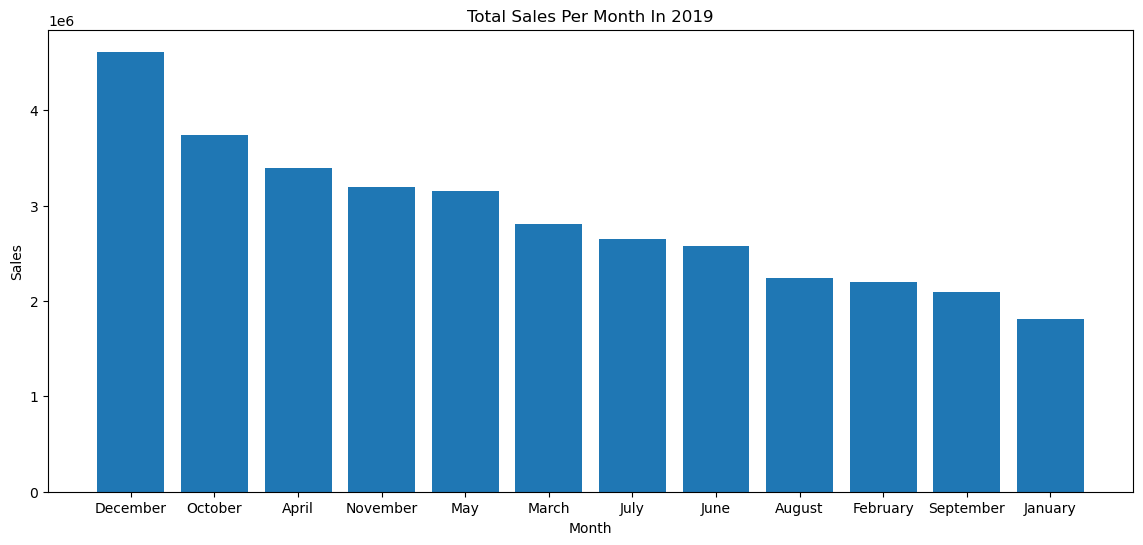

In [159]:
plt.figure(figsize=(14,6))
plt.title("Total Sales Per Month In 2019")
plt.bar(range(len(y)),y,0.8)
plt.xticks(range(len(y)),x)

plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()

december is the month with the highest amount of sales, this could be dues to the Christmas.

#### sales analysis by products

we can now check which item was sold the most throughout the year

In [160]:
product_grp =  df.groupby(["Product"])

In [161]:
y = product_grp["Total Price"].sum().sort_values(ascending=False)
y

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Total Price, dtype: float64

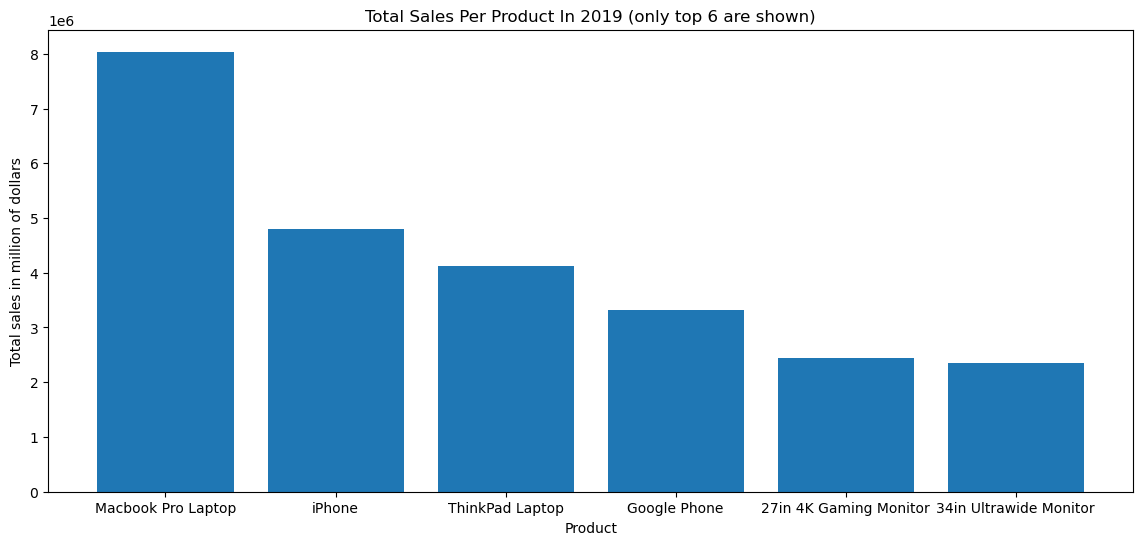

In [163]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Total Sales Per Product In 2019 (only top 6 are shown)")
plt.bar(range(6),y[:6],0.8)
plt.xticks(range(6),x[:6])
plt.xlabel('Product')
plt.ylabel('Total sales in million of dollars')


plt.show()

In [164]:
y =product_grp["Quantity"].sum().sort_values(ascending=False)
y

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity, dtype: int64

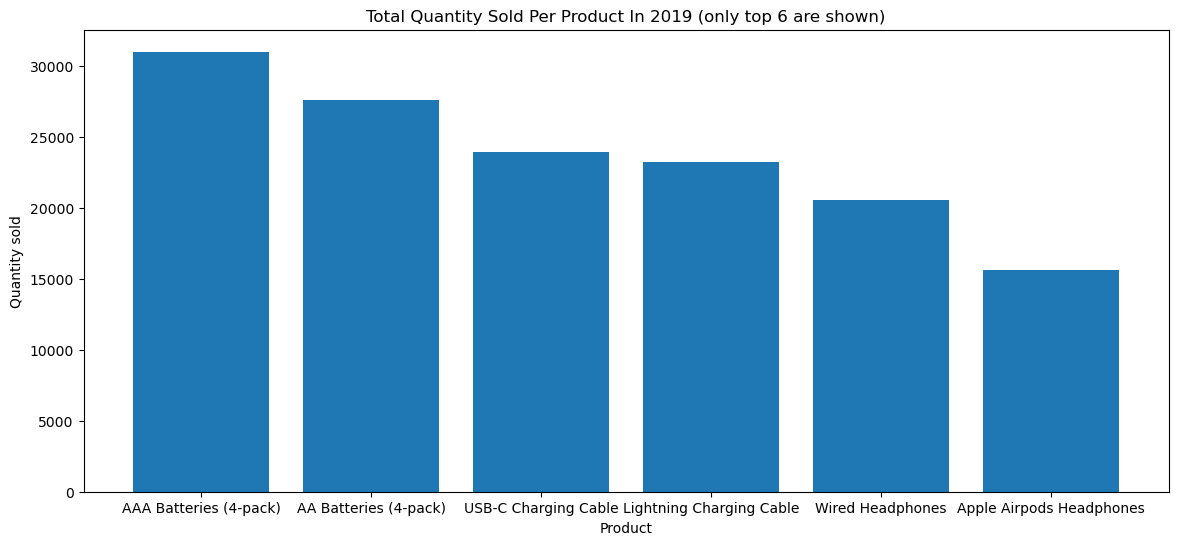

In [167]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Total Quantity Sold Per Product In 2019 (only top 6 are shown)")
plt.bar(range(6),y[:6],0.8)
plt.xticks(range(6),x[:6])

plt.xlabel('Product')
plt.ylabel('Quantity sold')


plt.show()

The item that sold the most was AAA Batteries, this could be because they are widely used product in lot of electronically operated toys and other accessories such as mouses,keyboards,etc...

due to the high variation in the prices of each product the tables for sum of sales and sum of quantity sold look completely different

we can check which product was sold the most and which product genereted more money during the month with highest sales which is December

Total price

In [168]:
y = product_grp.apply(lambda x:x[x["Month"]=="December"]["Total Price"].sum()).sort_values(ascending=False)
y

Product
Macbook Pro Laptop            1093100.00
iPhone                         634200.00
ThinkPad Laptop                538994.61
Google Phone                   429000.00
27in 4K Gaming Monitor         336951.36
34in Ultrawide Monitor         322611.51
Apple Airpods Headphones       311400.00
Flatscreen TV                  199800.00
Bose SoundSport Headphones     182381.76
27in FHD Monitor               144290.38
Vareebadd Phone                113600.00
20in Monitor                    62584.31
LG Dryer                        51600.00
LG Washing Machine              48000.00
Lightning Charging Cable        46150.65
USB-C Charging Cable            38837.50
Wired Headphones                32960.51
AA Batteries (4-pack)           14300.16
AAA Batteries (4-pack)          12680.59
dtype: float64

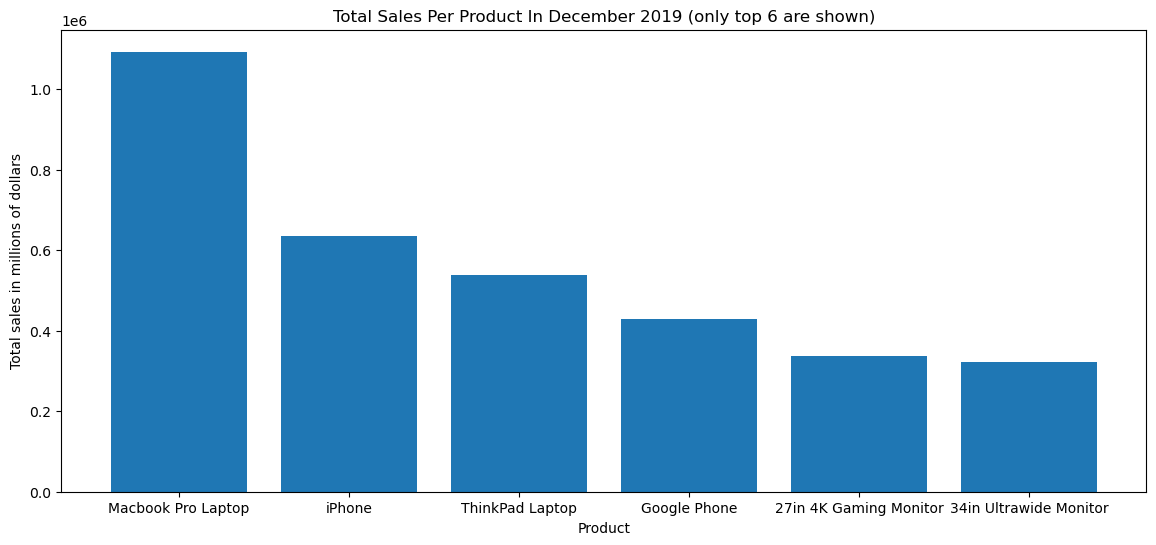

In [171]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Total Sales Per Product In December 2019 (only top 6 are shown)")
plt.bar(range(6),y[:6],0.8)
plt.xticks(range(6),x[:6])

plt.xlabel('Product')
plt.ylabel('Total sales in millions of dollars')



plt.show()

Quantity sold

In [172]:
y = product_grp.apply(lambda x:x[x["Month"]=="December"]["Quantity"].sum()).sort_values(ascending=False)
y

Product
AAA Batteries (4-pack)        4241
AA Batteries (4-pack)         3724
USB-C Charging Cable          3250
Lightning Charging Cable      3087
Wired Headphones              2749
Apple Airpods Headphones      2076
Bose SoundSport Headphones    1824
27in FHD Monitor               962
iPhone                         906
27in 4K Gaming Monitor         864
34in Ultrawide Monitor         849
Google Phone                   715
Flatscreen TV                  666
Macbook Pro Laptop             643
20in Monitor                   569
ThinkPad Laptop                539
Vareebadd Phone                284
LG Dryer                        86
LG Washing Machine              80
dtype: int64

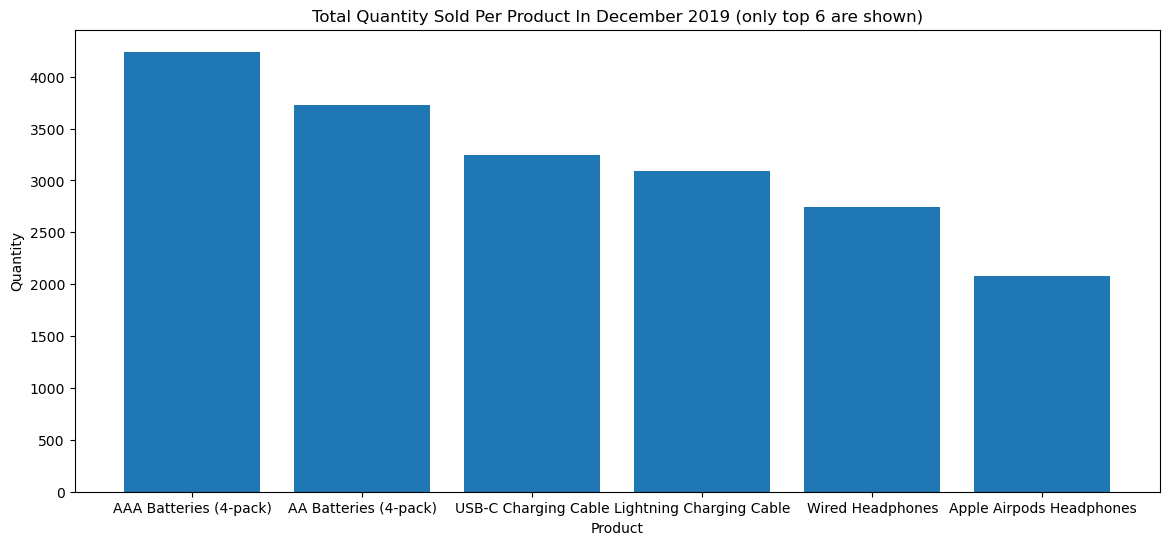

In [174]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Total Quantity Sold Per Product In December 2019 (only top 6 are shown)")
plt.bar(range(6),y[:6],0.8)
plt.xticks(range(6),x[:6])

plt.xlabel('Product')
plt.ylabel('Quantity')

plt.show()

### Sales analysis by City

In [175]:
City_grp = df.groupby(["City"])

to find which city has sold the most products

In [176]:
y = City_grp["Quantity"].sum().sort_values(ascending=False)
y

City
San Francisco    50239
Los Angeles      33289
New York City    27932
Boston           22528
Dallas           16730
Atlanta          16602
Seattle          16553
Portland         14053
Austin           11153
Name: Quantity, dtype: int64

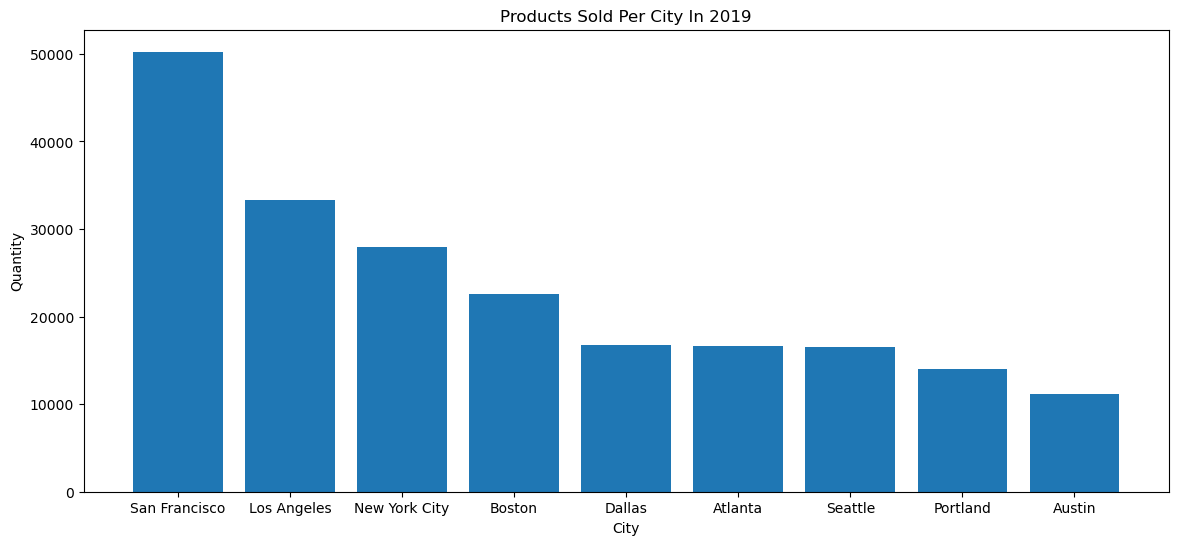

In [178]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Products Sold Per City In 2019")
plt.bar(range(len(y)),y,0.8)
plt.xticks(range(len(y)),x)

plt.xlabel('City')
plt.ylabel('Quantity')


plt.show()

to find which city contributed to highest sales

In [179]:
y = City_grp["Total Price"].sum().sort_values(ascending=False)
y

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Total Price, dtype: float64

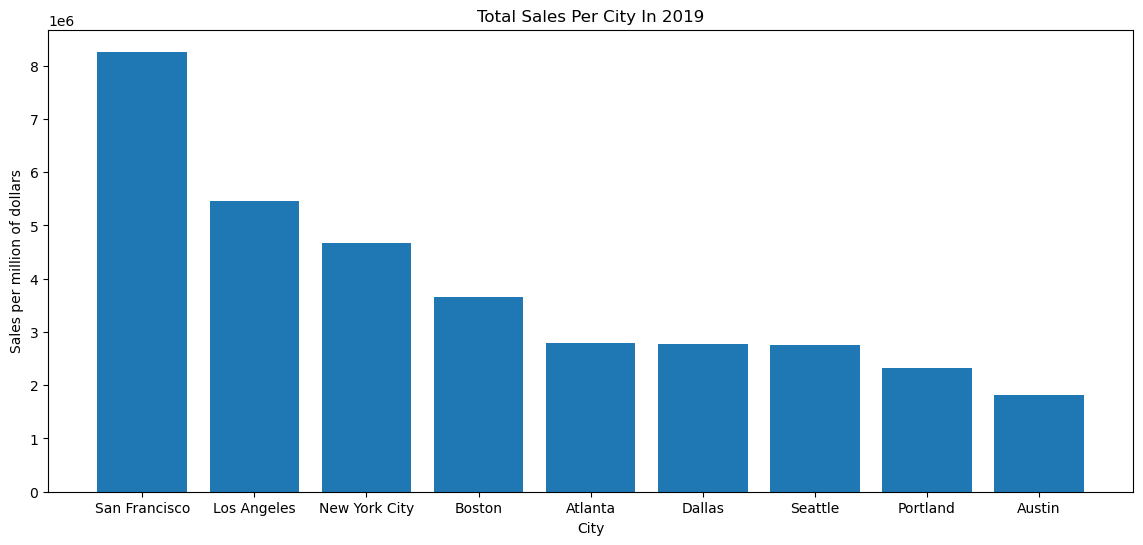

In [182]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Total Sales Per City In 2019")
plt.bar(range(len(y)),y,0.8)
plt.xticks(range(len(y)),x)

plt.xlabel('City')
plt.ylabel('Sales per million of dollars')



plt.show()

now we will see what time of the day the most amount of sales happen so that the business can decide what time to put out their advertisements to maximise sales

In [134]:
Time_grp = df.groupby("Time Of Day")

In [191]:
y = Time_grp["Total Price"].sum().sort_values(ascending=False) 
y

Time Of Day
Night        15776820.51
Morning      10217781.99
Afternoon     8497433.47
Name: Total Price, dtype: float64

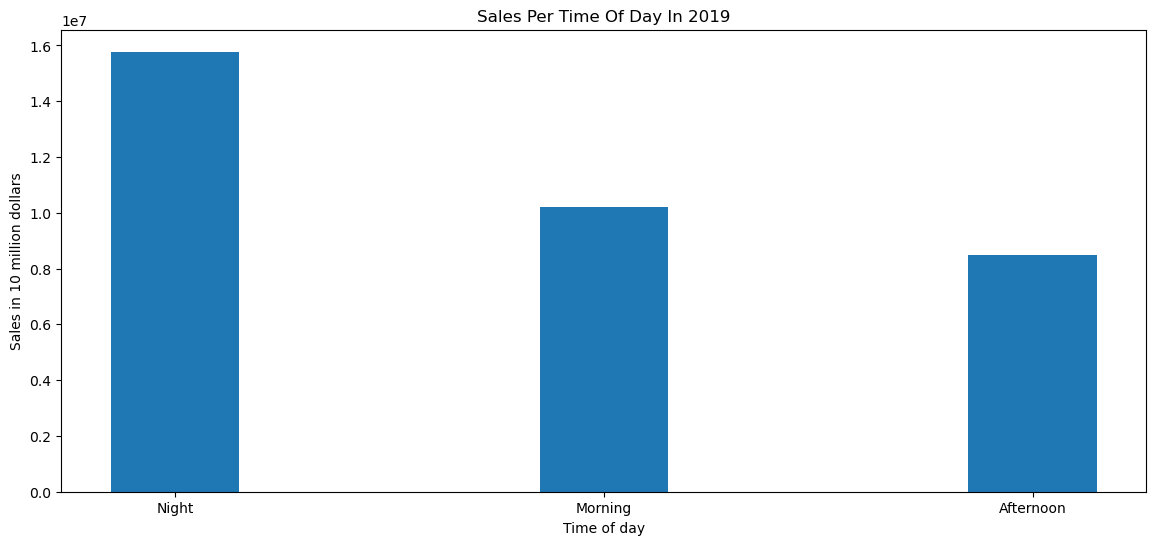

In [192]:
x = y.index
x

plt.figure(figsize=(14,6))
plt.title("Sales Per Time Of Day In 2019")
plt.bar(range(len(y)),y,0.3)
plt.xticks(range(len(y)),x)

plt.xlabel('Time of day')
plt.ylabel('Sales in 10 million dollars')


plt.show()

In [193]:
df["Hour"] =  df["Order Date"].dt.hour

C:\Users\23851739\AppData\Local\Temp\ipykernel_17312\3827408274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] =  df["Order Date"].dt.hour


In [194]:
grp_hours = df.groupby("Hour")

In [195]:
y = grp_hours["Order ID"].count()
x = grp_hours["Order ID"].count().index

In [196]:
y

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

In [197]:
x

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Hour')

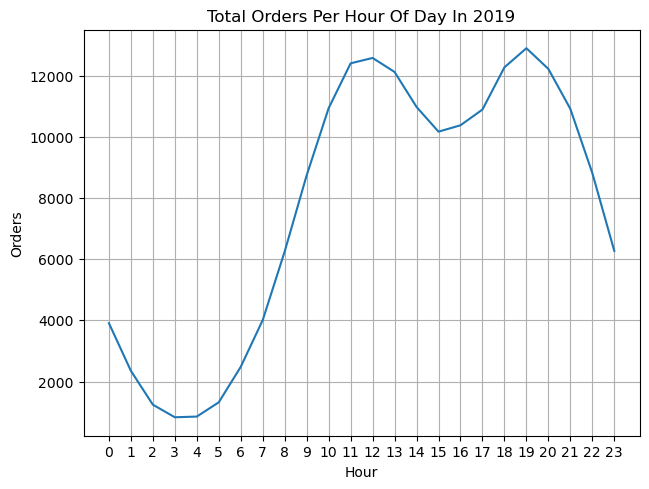

In [200]:
plt.plot(x,y)

plt.title("Total Orders Per Hour Of Day In 2019")

plt.grid()
plt.tight_layout()
plt.xticks(range(len(x)),x)

plt.xlabel('Hour')
plt.ylabel('Orders')

plt.show()

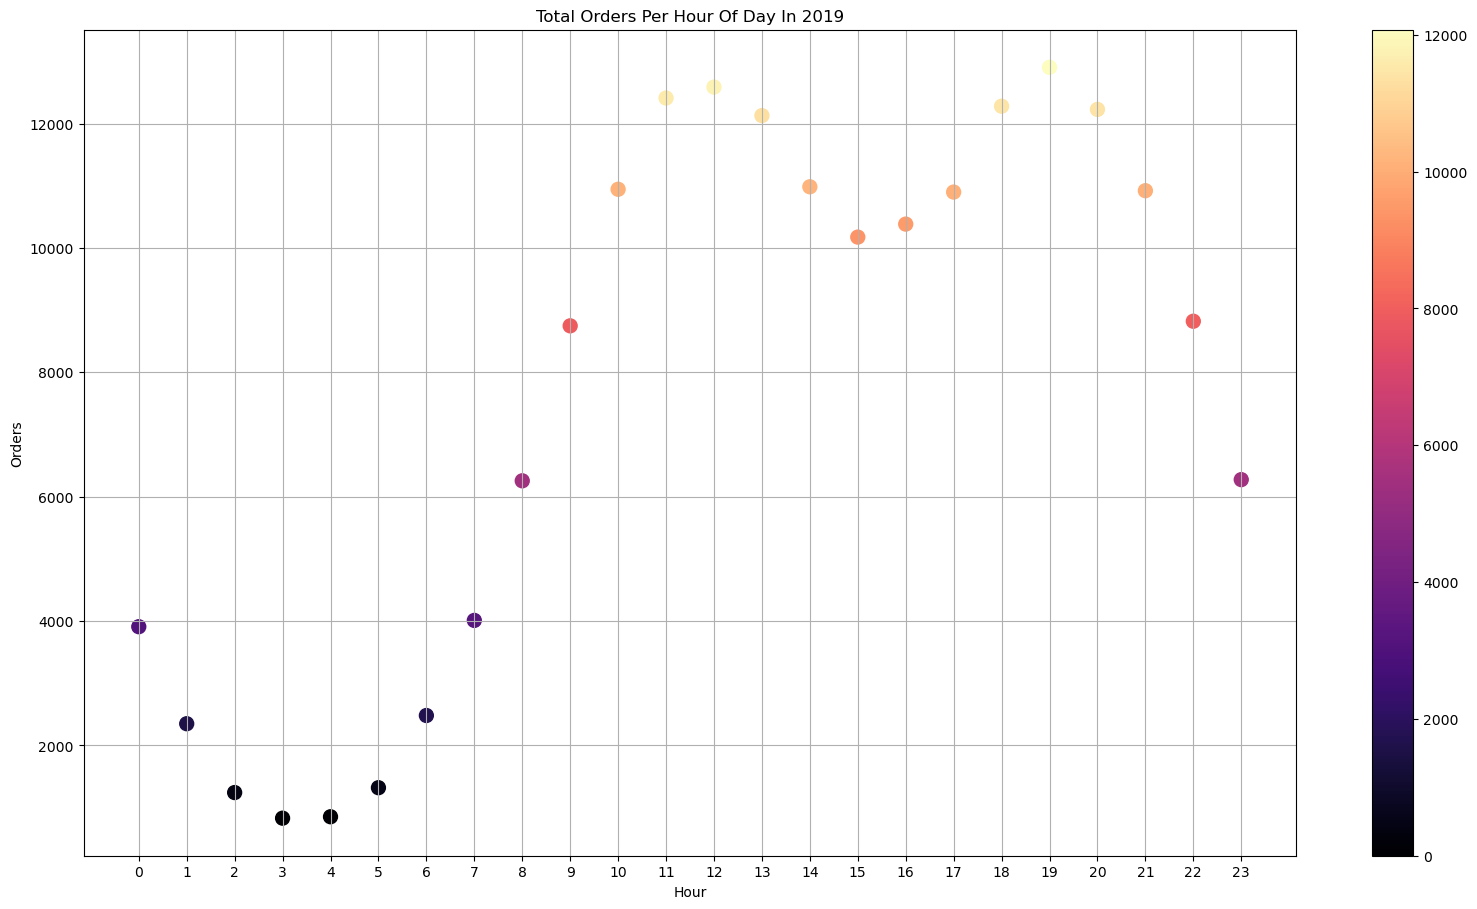

In [203]:
y_normalisation = (y - y.min()/y.max()-y.min())
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=y_normalisation,cmap="magma",s=100)

plt.title("Total Orders Per Hour Of Day In 2019")

plt.colorbar()
plt.grid()
plt.xticks(range(len(x)),x)
plt.tight_layout()

plt.xlabel('Hour')
plt.ylabel('Orders')

plt.show()


In [144]:
df.head()

,Order ID,Product,Quantity,Unit Price,Total Price,Address,State,City,Zip code,Order Date,Time Of Day,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,917 1st St,TX,Dallas,75001,2019-04-19 08:46:00,Morning,April,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,682 Chestnut St,MA,Boston,02215,2019-04-07 22:30:00,Night,April,22
3,176560,Google Phone,1,600.00,600.00,669 Spruce St,CA,Los Angeles,90001,2019-04-12 14:38:00,Afternoon,April,14
4,176560,Wired Headphones,1,11.99,11.99,669 Spruce St,CA,Los Angeles,90001,2019-04-12 14:38:00,Afternoon,April,14
5,176561,Wired Headphones,1,11.99,11.99,333 8th St,CA,Los Angeles,90001,2019-04-30 09:27:00,Morning,April,9


The time of the day where most of the sales occur is during the night time hence the advertisements should be posted between afternoon and night time hence the optimal time range would be between  15pm to 17pm

next we can check which items are often bought together

In [204]:
df["Order ID"] = pd.to_numeric(df["Order ID"])

C:\Users\23851739\AppData\Local\Temp\ipykernel_17312\2635855412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order ID"] = pd.to_numeric(df["Order ID"])


In [206]:
duplicates = df[df["Order ID"].duplicated(keep=False)]   # this looks for any rows that have the same order id and shows them all

next up we will take all these duplicates and put the products together in one of the rows 

In [207]:
duplicates["Grouped"] = duplicates.groupby("Order ID")["Product"].transform(lambda x:",".join(x))    # the lambda function takes the values from all the different rows with the same order id and groups them together

C:\Users\23851739\AppData\Local\Temp\ipykernel_17312\1781390027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates["Grouped"] = duplicates.groupby("Order ID")["Product"].transform(lambda x:",".join(x))    # the lambda function takes the values from all the different rows with the same order id and groups them together


now we can drop the duplicates

In [208]:
duplicates = duplicates[["Order ID","Grouped"]].drop_duplicates()
duplicates

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


next we need to count which pairs appear the most this row and for that we will need the following functions from these two libraries

In [209]:
from itertools import combinations
from collections import Counter

In [210]:
df

,Order ID,Product,Quantity,Unit Price,Total Price,Address,State,City,Zip code,Order Date,Time Of Day,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,917 1st St,TX,Dallas,75001,2019-04-19 08:46:00,Morning,April,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,682 Chestnut St,MA,Boston,02215,2019-04-07 22:30:00,Night,April,22
3,176560,Google Phone,1,600.00,600.00,669 Spruce St,CA,Los Angeles,90001,2019-04-12 14:38:00,Afternoon,April,14
4,176560,Wired Headphones,1,11.99,11.99,669 Spruce St,CA,Los Angeles,90001,2019-04-12 14:38:00,Afternoon,April,14
5,176561,Wired Headphones,1,11.99,11.99,333 8th St,CA,Los Angeles,90001,2019-04-30 09:27:00,Morning,April,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,840 Highland St,CA,Los Angeles,90001,2019-09-17 20:56:00,Night,September,20
186846,259354,iPhone,1,700.00,700.00,216 Dogwood St,CA,San Francisco,94016,2019-09-01 16:00:00,Night,September,16
186847,259355,iPhone,1,700.00,700.00,220 12th St,CA,San Francisco,94016,2019-09-23 07:39:00,Morning,September,7
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,511 Forest St,CA,San Francisco,94016,2019-09-19 17:30:00,Night,September,17


we first need to turn our grouped column into a list of lists

In [211]:
count =Counter()

for row in duplicates["Grouped"]:
    row_list = row.split(",")                      #first we are splitting the row back to being 2 separated values
    count.update(Counter(combinations(row_list,2)))                #next we check through all the different types of rows and see which one keep appearing and we count them
   #count.update(Counter(combinations(row_list,3)))                #this one display which triplets of values appear and are counted.

# count.most_common(10)        #this is to see the top 10
    
#to print out the results in a better format

for key,value in count.most_common(10):
    print(key,value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### the most commonly sold pair of products is 'iPhone', 'Lightning Charging Cable' hence one way to increase future sales can be to sell these 2 products together in a bundle.

### we can also compare the price of product per unit compared to the quantity of that product sold

In [217]:
y = product_grp["Quantity"].sum().sort_values(ascending=False).values
y
x = product_grp["Quantity"].sum().sort_values(ascending=False).index
x

y2 = product_grp[["Quantity","Unit Price"]].agg({"Quantity":"sum","Unit Price":"max"}).sort_values(by="Quantity",ascending=False)




In [218]:
y2 = y2["Unit Price"]

In [219]:
y2

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Lightning Charging Cable        14.95
Wired Headphones                11.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
27in FHD Monitor               149.99
iPhone                         700.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Google Phone                   600.00
Flatscreen TV                  300.00
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
20in Monitor                   109.99
Vareebadd Phone                400.00
LG Washing Machine             600.00
LG Dryer                       600.00
Name: Unit Price, dtype: float64

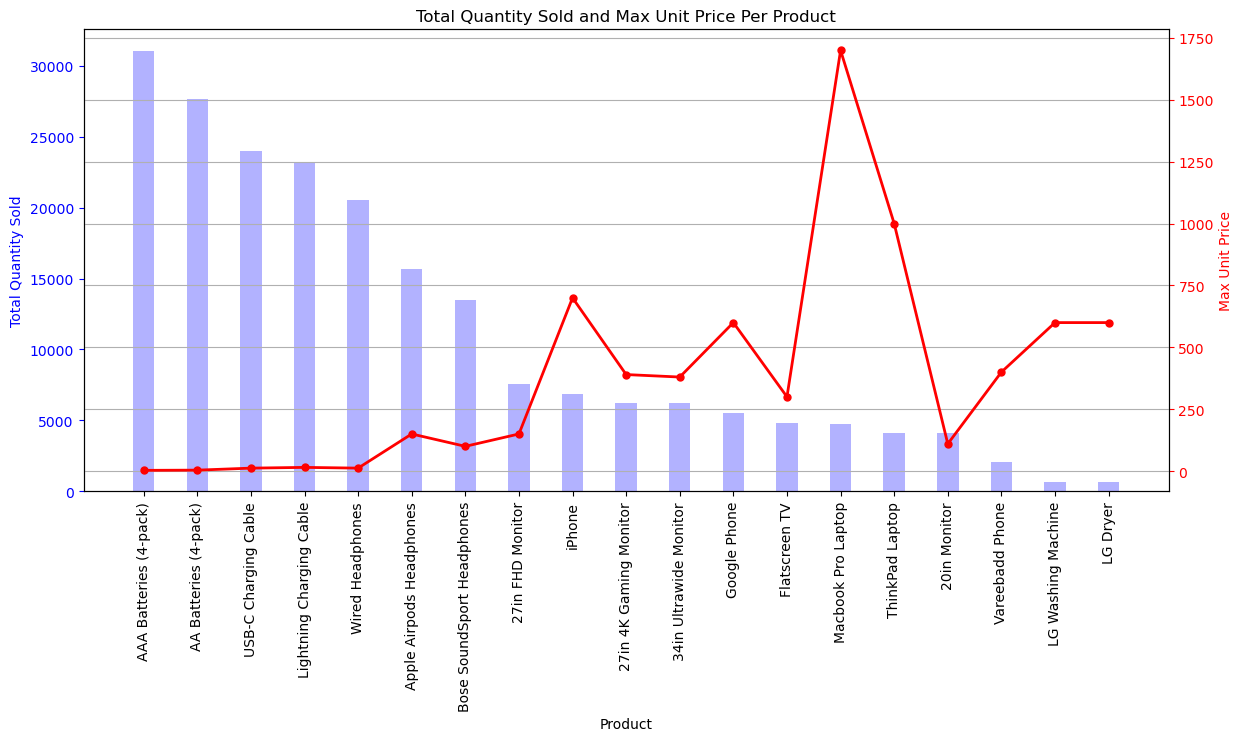

In [220]:
plt.figure(figsize=(14,6))
plt.title("Total Quantity Sold and Max Unit Price Per Product")


ax1 = plt.gca()  # Get the current axes instance
bars = ax1.bar(range(len(y)), y, width=0.4, label='Total Quantity Sold', color='b', alpha=0.3)





ax2 = ax1.twinx()
line = ax2.plot(range(len(x)), y2, color='r', marker='o', linestyle='-', linewidth=2, markersize=5, label='Max Unit Price')



ax1.set_ylabel('Total Quantity Sold', color='b')
ax1.set_xlabel('Product')
ax1.tick_params('y', colors='b')
ax2.set_ylabel('Max Unit Price', color='r')
ax2.tick_params('y', colors='r')
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)
plt.grid()
plt.show()


#### as we can see there seems to be a trend of low price = high quantity sold and vice versa but it is kind of seems to plateau when price reaches around the 200$ band. Further test are require to confirm the correlation